# Steps

Data is taken from Finance Toolkit:
https://github.com/JerBouma/FinanceToolkit

Import the libraries

In [687]:
from financetoolkit import Toolkit
import os
import pandas as pd


## Target Companies

Here's the list of stocks we wanted to investigate.  Right now I'm only looking at three of them while I tune the model.

In [683]:
target_cusip = ["DIS", "T", "MSFT", "VZ", "DD", "DOW", "MMM", 
         "XOM", "CVX", "VLO", "OXY", "HAL", "SLB", "JPM", 
         "C", "FITB", "TFC", "USB", "CMA", "GWW", "FAST", "CMI", 
         "PCAR", "GPC", "AZO", "AMZN", "META", "TXN", "ADBE", 
         "INTU", "PG", "KO", "PEP", "HSY", "INTC", "CSCO", "NEE", 
         "SO", "DUK", "LLY", "MRK", "PFE", "BMY", "HD", "LOW", "WMT", 
         "COST", "SPG"]
cusip = ["DIS", "T", "MSFT"]
companies = Toolkit(cusip, api_key="fd20a64bb6b70c20414b3d302996e4e4", quarterly=True, start_date='2005-09-01')

## Data

The data is taken from three different API endpoints from finance toolkit:

1. get_income_statement
2. get_historical_data
3. get_cashflow_statement

They're all described in the [basic usage](https://www.jeroenbouma.com/projects/financetoolkit#basic-usage) section.

In [613]:
incs = companies.get_income_statement()
incs.head()

date                                        2005Q3       2005Q4       2006Q1  \
DIS Revenue                           7734000000.0 8854000000.0 8027000000.0   
    Cost of Goods Sold                7321000000.0 7693000000.0 6841000000.0   
    Gross Profit                       413000000.0 1161000000.0 1186000000.0   
    Gross Profit Ratio                      0.0534       0.1311       0.1478   
    Research and Development Expenses          0.0          0.0          0.0   

date                                        2006Q2       2006Q3       2006Q4  \
DIS Revenue                           8620000000.0 8784000000.0 9725000000.0   
    Cost of Goods Sold                6832000000.0 7441000000.0 8009000000.0   
    Gross Profit                      1788000000.0 1343000000.0 1716000000.0   
    Gross Profit Ratio                      0.2074       0.1529       0.1765   
    Research and Development Expenses          0.0          0.0          0.0   

date                                        2007Q1       2007Q2       2007Q3  \
DIS Revenue                           8073000000.0 9045000000.0 8930000000.0   
    Cost of Goods Sold                6540000000.0 7022000000.0 7359000000.0   
    Gross Profit                      1533000000.0 2023000000.0 1571000000.0   
    Gross Profit Ratio                      0.1899       0.2237       0.1759   
    Research and Development Expenses          0.0          0.0          0.0   

date                                         2007Q4  ...        2021Q2  \
DIS Revenue                           10452000000.0  ... 15613000000.0   
    Cost of Goods Sold                 8419000000.0  ...  9782000000.0   
    Gross Profit                       2033000000.0  ...  5831000000.0   
    Gross Profit Ratio                       0.1945  ...        0.3735   
    Research and Development Expenses           0.0  ...           0.0   

date                                         2021Q3        2021Q4  2022Q1  \
DIS Revenue                           17022000000.0 21819000000.0     NaN   
    Cost of Goods Sold                11233000000.0 14567000000.0     NaN   
    Gross Profit                       5789000000.0  7252000000.0     NaN   
    Gross Profit Ratio                       0.3401        0.3324     NaN   
    Research and Development Expenses           0.0           0.0     NaN   

date                                         2022Q2        2022Q3  \
DIS Revenue                           19249000000.0 20150000000.0   
    Cost of Goods Sold                12594000000.0 19608000000.0   
    Gross Profit                       6655000000.0   542000000.0   
    Gross Profit Ratio                       0.3457        0.0269   
    Research and Development Expenses           0.0           0.0   

date                                         2022Q4        2023Q1  \
DIS Revenue                           23512000000.0 21815000000.0   
    Cost of Goods Sold                21519000000.0 19540000000.0   
    Gross Profit                       1993000000.0  2275000000.0   
    Gross Profit Ratio                       0.0848        0.1043   
    Research and Development Expenses           0.0           0.0   

date                                         2023Q2        2023Q3  
DIS Revenue                           22330000000.0 21241000000.0  
    Cost of Goods Sold                19689000000.0 19158000000.0  
    Gross Profit                       2641000000.0  2083000000.0  
    Gross Profit Ratio                       0.1183        0.0981  
    Research and Development Expenses           0.0           0.0  

[5 rows x 73 columns]

In [614]:
hist = companies.get_historical_data(period="quarterly")
hist.head()

Open                        High                         Low  \
        MSFT Benchmark   DIS     T  MSFT Benchmark   DIS     T  MSFT   
Date                                                                   
2005Q3 25.91    122.62 23.72 17.85 25.95    123.04 24.02  18.2 25.61   
2005Q4 26.15     124.8 23.82 18.47 26.31    125.06 23.86 18.54  26.1   
2006Q1  27.3    130.02 27.47 20.42 27.54    130.24 27.67 20.61 27.21   
2006Q2 23.54    127.54 29.48 20.93 23.65    127.66 29.76 21.12  23.3   
2006Q3 27.35     133.8 30.53 24.45 27.42    133.94 30.88  24.6 27.21   

                  ... Excess Return         Excess Volatility            \
       Benchmark  ...           DIS       T              MSFT Benchmark   
Date              ...                                                     
2005Q3    121.74  ...        -0.085 -0.0155            0.0831    0.0466   
2005Q4    124.36  ...       -0.0403 -0.0023            0.0635    0.0521   
2006Q1    129.37  ...        0.1153  0.0753            0.0843    0.0496   
2006Q2    126.96  ...        0.0244 -0.0034            0.1478    0.0658   
2006Q3    133.48  ...       -0.0161  0.1401            0.1027    0.0497   

                     Cumulative Return                          
          DIS      T              MSFT Benchmark    DIS      T  
Date                                                            
2005Q3 0.0895 0.0626               1.0       1.0    1.0    1.0  
2005Q4 0.0756  0.068            1.0193    1.0173 1.0036 1.0416  
2006Q1 0.1165 0.0867            1.0639    1.0649 1.1679 1.1705  
2006Q2 0.0926 0.0834            0.9146    1.0486 1.2565 1.2266  
2006Q3 0.0994 0.0896            1.0776    1.1055 1.2944 1.4553  

[5 rows x 48 columns]

### Coalesce Data

The data from the different reports are in different formats.  E.g. the index for income statements is in terms of the metric, while the index for the historical data is in terms of the date.

To unify and join the data, I chose to "melt" the data into the simplest possible format, a list of metrics, dates, and cusips.

In [616]:
incs = companies.get_income_statement().T.melt(var_name=["cusip", "metric"], ignore_index=False)
incs.metric = "$INC " + incs.metric
incs.shape

(6132, 3)

### Melted Data

We can see the results of the melting below:

In [685]:
incs.head()

,cusip,metric,value
date,,,
2005Q3,DIS,$INC Revenue,7734000000.0
2005Q4,DIS,$INC Revenue,8854000000.0
2006Q1,DIS,$INC Revenue,8027000000.0
2006Q2,DIS,$INC Revenue,8620000000.0
2006Q3,DIS,$INC Revenue,8784000000.0


In [617]:
hist = companies.get_historical_data(period="quarterly").melt(var_name=["metric","cusip"], ignore_index=False)
hist.index=hist.index.rename("date")
hist.metric = "$HST " + hist.metric
hist.shape

(3600, 3)

In [618]:
cash = companies.get_cash_flow_statement().melt(ignore_index=False).reset_index(names=["cusip", "metric"]).set_index("date")
cash.metric = "$CSH " + cash.metric
cash.shape

(6570, 3)

### Merged Data

Now we can merge the data by simply concatenating all of the melted datasets together.

In [619]:

all = pd.concat([incs,hist, cash ])
all = all.reset_index().set_index(["date", "cusip"])

### Pivoted Data
To recreate the data in the format we want to follow, we need to pivot the data on the simple melted metric/value setup into proper metric columns

In [620]:
all = all.pivot(columns="metric", values="value")

In [673]:
all.columns

Index(['$CSH Accounts Payables', '$CSH Accounts Receivables',
       '$CSH Acquisitions', '$CSH Capital Expenditure',
       '$CSH Cash Beginning of Period', '$CSH Cash End of Period',
       '$CSH Cash Flow from Financing', '$CSH Cash Flow from Investing',
       '$CSH Cash Flow from Operations', '$CSH Change in Working Capital',
       '$CSH Common Stock Issued', '$CSH Common Stock Purchased',
       '$CSH Debt Repayment', '$CSH Deferred Income Tax',
       '$CSH Depreciation and Amortization', '$CSH Dividends Paid',
       '$CSH Forex Changes on Cash', '$CSH Free Cash Flow', '$CSH Inventory',
       '$CSH Net Change in Cash', '$CSH Net Income',
       '$CSH Operating Cash Flow', '$CSH Other Financing Activities',
       '$CSH Other Investing Activities', '$CSH Other Non Cash Items',
       '$CSH Other Working Capital', '$CSH Property, Plant and Equipment',
       '$CSH Purchases of Investments', '$CSH Sales of Investments',
       '$CSH Stock Based Compensation', '$HST Adj Close', '

In [621]:
all.head()

metric            $CSH Accounts Payables  $CSH Accounts Receivables  \
date   cusip                                                          
2005Q3 Benchmark                     NaN                        NaN   
       DIS                           0.0                        0.0   
       MSFT                          0.0               1408000000.0   
       T                             0.0               -156000000.0   
2005Q4 Benchmark                     NaN                        NaN   

metric            $CSH Acquisitions  $CSH Capital Expenditure  \
date   cusip                                                    
2005Q3 Benchmark                NaN                       NaN   
       DIS                      0.0              -636000000.0   
       MSFT            -187000000.0              -213000000.0   
       T               1464000000.0             -1414000000.0   
2005Q4 Benchmark                NaN                       NaN   

metric            $CSH Cash Beginning of Period  $CSH Cash End of Period  \
date   cusip                                                               
2005Q3 Benchmark                            NaN                      NaN   
       DIS                         2034000000.0             1723000000.0   
       MSFT                        4851000000.0             2974000000.0   
       T                            406000000.0              433000000.0   
2005Q4 Benchmark                            NaN                      NaN   

metric            $CSH Cash Flow from Financing  \
date   cusip                                      
2005Q3 Benchmark                            NaN   
       DIS                        -1007000000.0   
       MSFT                       -2941000000.0   
       T                          -3366000000.0   
2005Q4 Benchmark                            NaN   

metric            $CSH Cash Flow from Investing  \
date   cusip                                      
2005Q3 Benchmark                            NaN   
       DIS                         -622000000.0   
       MSFT                       -3261000000.0   
       T                             50000000.0   
2005Q4 Benchmark                            NaN   

metric            $CSH Cash Flow from Operations  \
date   cusip                                       
2005Q3 Benchmark                             NaN   
       DIS                          1318000000.0   
       MSFT                         4329000000.0   
       T                            3343000000.0   
2005Q4 Benchmark                             NaN   

metric            $CSH Change in Working Capital  ...  $INC Operating Income  \
date   cusip                                      ...                          
2005Q3 Benchmark                             NaN  ...                    NaN   
       DIS                           451000000.0  ...            413000000.0   
       MSFT                         1166000000.0  ...           4046000000.0   
       T                             435000000.0  ...           1962000000.0   
2005Q4 Benchmark                             NaN  ...                    NaN   

metric            $INC Operating Income Ratio  $INC Other Expenses  \
date   cusip                                                         
2005Q3 Benchmark                          NaN                  NaN   
       DIS                             0.0534                  0.0   
       MSFT                            0.4154                  0.0   
       T                               0.1901          -70000000.0   
2005Q4 Benchmark                          NaN                  NaN   

metric            $INC Research and Development Expenses  $INC Revenue  \
date   cusip                                                             
2005Q3 Benchmark                                     NaN           NaN   
       DIS                                           0.0  7734000000.0   
       MSFT                                 1515000000.0  9741000000.0   
       T  

## Model Data

Now we can work on modeling.  Firstly, we need to import some modeling related libraries.

In [662]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

### Gather Input

We can collect the field we want to use by selecting them from the index.

We're picking out Disney for the rest of the examples here.

In [674]:
columns = ["$INC EPS Diluted", "$HST Dividends", "$INC Weighted Average Shares", "$CSH Free Cash Flow", "$INC Revenue", "$HST Close"]
data = all[columns].dropna()
data = data.reset_index().set_index("date")
data = data[data["cusip"] == "DIS"]


### Gather features

We want to put some of the features in ratio form.  We do that below.

In [675]:
data["Cash Flow/Shares"] = data["$CSH Free Cash Flow"]/data["$INC Weighted Average Shares"]
data["Revenue/Shares"] = data["$INC Revenue"]/data["$INC Weighted Average Shares"]

### Clean up and Set Target

We're cleaning up the features for input, and adjusting the target for modeling.

The target field is the historical close price for the next quarter.  Our data is quarterly, and there are 4 companies in this data.  To make the adjustment, we shift the target forward 4 observations, and drop the last 4 obervations from the input.

In [679]:
input = data.drop(["$HST Close", "cusip", "$CSH Free Cash Flow", "$INC Revenue"], axis=1)[:-4]
target = data["$HST Close"].shift(-4).dropna()

In [680]:
input

metric,$INC EPS Diluted,$HST Dividends,$INC Weighted Average Shares,Cash Flow/Shares,Revenue/Shares
date,,,,,
2005Q3,0.13,0.0,1940000000.0,0.3515463917525773,3.98659793814433
2005Q4,0.37,0.27,1940000000.0,0.19381443298969073,4.563917525773196
2006Q1,0.37,0.0,1924000000.0,0.6980249480249481,4.172037422037422
2006Q2,0.53,0.0,2071000000.0,0.5601158860453888,4.162240463544181
2006Q3,0.38,0.0,2059000000.0,0.9130645944633318,4.266148615832929
...,...,...,...,...,...
2021Q2,0.49,0.0,1817000000.0,0.34012107870115577,8.592735277930656
2021Q3,0.5,0.0,1818000000.0,0.2871287128712871,9.363036303630363
2021Q4,0.6,0.0,1819000000.0,-0.6498075865860363,11.995052226498077


### Fit the Model

Basic Fitting

In [681]:
linear_regressor = LinearRegression() 
linear_regressor.fit(input, target)  # perform linear regression
pred = linear_regressor.predict(input)  # make predictions

<Axes: title={'center': 'Disney'}, xlabel='date'>

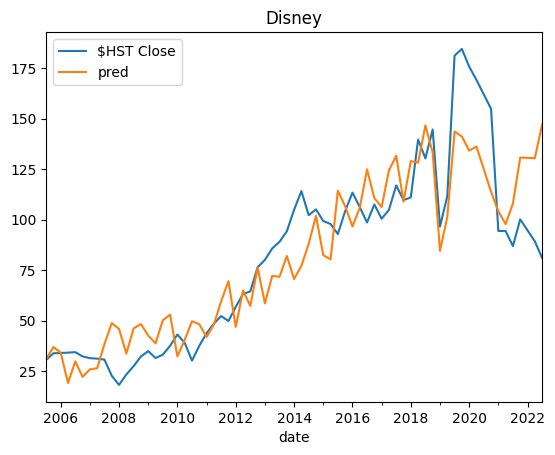

In [682]:
dat = pd.DataFrame(target)
dat["pred"] = pred
dat.plot(title="Disney")